#Evaluación Final - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
Proponga al menos 6 preguntas que podamos responder con un modelo de Machine Learning, que permita hacer una proyección o una clasificación de acuerdo al aspecto elegido de los datos.

Detecte correlaciones relevantes que permitan hacer más óptimo el modelo de ML en combinación con los algoritmos e hiperparámetros adecuados de acuerdo a la solución planteada.

Elabore un informe en Jupyter Notebook haciendo uso de cuadros de texto y cuadros de código para robustecer la solución planteada.


Datos: https://drive.google.com/file/d/1APpywYHEexQEGElHT5CJUoz9RgWdohqh/view?usp=sharing


---



**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

# Análisis Exploratorio de Datos

#### Importamos librerías escenciales

In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

#### Importamos los modelos de Clasificación

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Importamos los modelos de Regresión

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#### Importamos librerias necesarias para trabajar el modelo

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_excel('PlayStore.xlsx') #Hacemos lectura del dataset
df.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48,25.0,"5,000 aprox.",Gratis,0.0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,4.7,353,4.2,"10,000 aprox.",Gratis,0.0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815,29.0,"1,000,000 aprox.",Gratis,0.0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216,39.0,"5,000,000 aprox.",Gratis,0.0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880,28.0,"1,000,000 aprox.",Gratis,0.0,Todo público


In [7]:
# Análisis preliminar del modelo
print(df.shape)
print(df.info())

(9141, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   int64  
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   object 
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 642.9+ KB
None


#### Como podemos apreciar, el dataset consta de 9 columnas y 9141 filas
#### Todos los valores, a excepción de la valoración están 100% integros (1416 valores perdidos)
#### La columna 'Descargas' debe parsearse a un valor numérico

In [8]:
df.Descargas = df.Descargas.apply(lambda x: x.replace(' aprox.', ''))
df.Descargas = df.Descargas.apply(lambda x: x.replace(',', ''))
df.Descargas = df.Descargas.astype(np.float64)
df.Comentarios = df.Comentarios.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   float64
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   float64
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(5), object(4)
memory usage: 642.9+ KB


In [9]:
df[['Valoración', 'Tamaño(M)', 'Precio']].describe()

,Valoración,Tamaño(M),Precio
count,7725.000000,9141.000000,9141.000000
mean,4.173735,37.047391,1.184885
std,0.544548,98.893732,17.359533
min,1.000000,1.000000,0.000000
25%,4.000000,5.600000,0.000000
50%,4.300000,15.000000,0.000000
75%,4.500000,34.000000,0.000000
max,5.000000,1020.000000,400.000000


In [10]:
df[['Comentarios', 'Descargas']].describe().astype(np.int64)

,Comentarios,Descargas
count,9141,9141
mean,249157,7117898
std,1716578,46203441
min,0,0
25%,22,1000
50%,742,100000
75%,25094,1000000
max,44893888,1000000000


#### Analizamos posibles variables explicativas

In [30]:
df.Tipo.value_counts()

Gratis    8417
Pago       724
Name: Tipo, dtype: int64

In [31]:
df.App.value_counts()

ROBLOX                                                 9
Candy Crush Saga                                       7
8 Ball Pool                                            7
Temple Run 2                                           6
Helix Jump                                             6
                                                      ..
Autool BT-BOX                                          1
Castle Clash: Epic Empire ES                           1
CNY Slots : Gong Xi Fa Cai <U+53D1><U+8D22><U+673A>    1
HCP Anywhere                                           1
Complete Spanish Movies                                1
Name: App, Length: 8430, dtype: int64

In [32]:
df.Categoría.value_counts()

FAMILIA                   1770
JUEGO                     1051
HERRAMIENTAS               738
MÉDICO                     433
NEGOCIO                    400
PERSONALIZACIÓN            356
ESTILO DE VIDA             349
DEPORTES                   310
FINANCIERAS                306
PRODUCTIVIDAD              303
SALUD Y BELLEZA            265
COMUNICACIÓN               264
FOTOGRAFÍA                 253
NOTICIAS                   215
DATOS                      212
SOCIAL                     209
COMPRAS                    201
LIBROS Y REFRERENCIAS      197
VIAJES                     192
REPRODUCTORES DE VIDEO     129
EDUCACIÓN                  124
MAPAS Y NAVEGACIÓN         108
ENTRETENIMIENTO            102
COMIDA Y BEBIDA            100
LIBRERIAS                   82
VEHICULOS                   75
CASA Y HOGAR                68
ARTE Y DISEÑO               65
EVENTOS                     57
CLIMA                       57
PADRES                      53
HISTORIETAS                 50
BELLEZA 

In [24]:
# Optamos por droppear las valoraciones nulas
data = df
apps = data.dropna(axis=0, how='any')
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            7725 non-null   object 
 1   Categoría      7725 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    7725 non-null   float64
 4   Tamaño(M)      7725 non-null   float64
 5   Descargas      7725 non-null   float64
 6   Tipo           7725 non-null   object 
 7   Precio         7725 non-null   float64
 8   Clasificación  7725 non-null   object 
dtypes: float64(5), object(4)
memory usage: 603.5+ KB


#### Separamos el dataset inicial en dos subset  para analizar las aplicaciones de pago por un lado, y por otro las gratis

In [27]:
free_apps = apps[apps.Tipo == "Gratis"]
paid_apps = apps[apps.Tipo == "Pago"]

free_apps.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48.0,25.0,5000.0,Gratis,0.0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,4.7,353.0,4.2,10000.0,Gratis,0.0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815.0,29.0,1000000.0,Gratis,0.0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216.0,39.0,5000000.0,Gratis,0.0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880.0,28.0,1000000.0,Gratis,0.0,Todo público


In [29]:
paid_apps.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
11,X Launcher Prime: With OS Style Theme & No Ads,ARTE Y DISEÑO,4.7,149.0,3.5,1000.0,Pago,1.99,Todo público
32,X Launcher Pro - IOS Style Theme & Control Center,ARTE Y DISEÑO,4.8,1216.0,8.6,10000.0,Pago,1.99,Todo público
59,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ARTE Y DISEÑO,4.7,801.0,3.5,5000.0,Pago,1.99,Todo público
201,MyRadar NOAA Weather Radar Ad Free,CLIMA,4.5,3005.0,26.0,10000.0,Pago,2.99,Todo público
207,Weather Forecast Pro,CLIMA,4.7,14051.0,8.7,100000.0,Pago,3.99,Todo público


## Análisis de correlaciones de las aplicaciones gratis

In [ ]:
sbn.set(
    rc={
        'figure.figsize' : (10,10)
    }
)
sbn.heatmap(
    free_apps.corr(),
    annot=True
)

NameError: name 'sbn' is not defined

## Análisis de correlaciones de las aplicaciones de pago

In [4]:
sbn.set(
    rc={
        'figure.figsize' : (10,10)
    }
)
sbn.heatmap(
    paid_apps.corr(),
    annot=True
)

NameError: name 'paid_apps' is not defined

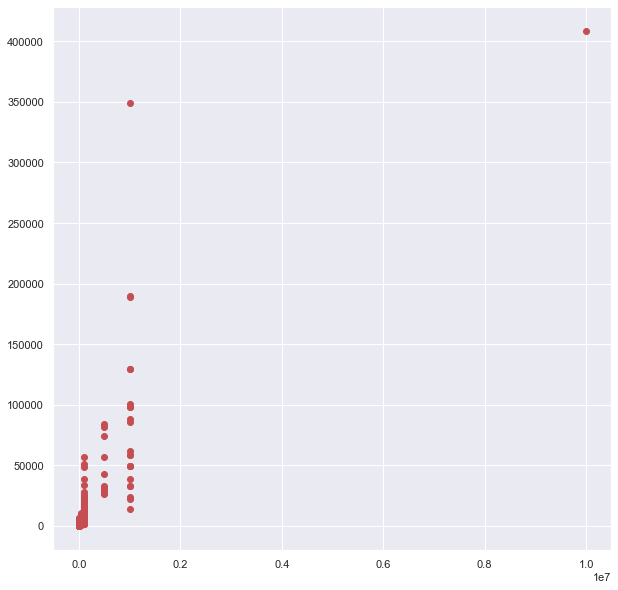

In [35]:
plt.plot(paid_apps.Descargas, paid_apps.Comentarios, 'ro')

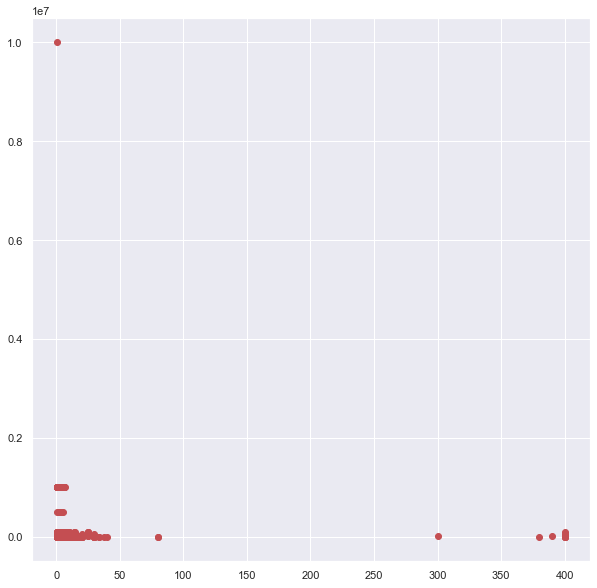

In [37]:
plt.plot(paid_apps.Precio, paid_apps.Descargas, 'ro')

<AxesSubplot:xlabel='Precio', ylabel='Comentarios'>

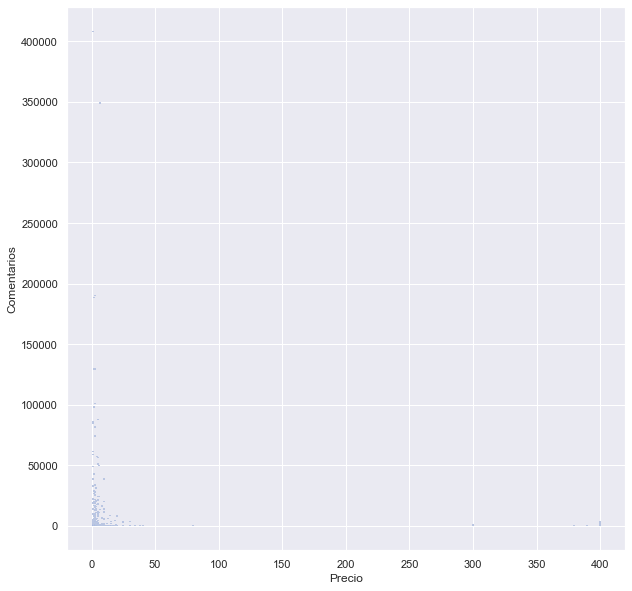

In [46]:
# Dropeamos valor atípico para concentrarnos en la tendencia central de los datos
paid_apps = paid_apps[paid_apps.Precio < 400]
sbn.histplot(data=paid_apps, x='Precio', y='Comentarios')

## Continuamos trabajando el dataset inicial

In [66]:
apps['Gratis'] = [1 if ele  == "Gratis" else 0 for ele in apps.Tipo]
apps['Pagada'] = [1 if ele  == "Pago" else 0 for ele in apps.Tipo]
apps[apps['Tipo']!='Pago'].head()


<ipython-input-66-00716a5e827b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['Gratis'] = [1 if ele  == "Gratis" else 0 for ele in apps.Tipo]
<ipython-input-66-00716a5e827b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['Pagada'] = [1 if ele  == "Pago" else 0 for ele in apps.Tipo]


,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,Gratis,Pagada
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48.0,25.0,5000.0,Gratis,0.0,Todo público,1,0
1,I Creative Idea,ARTE Y DISEÑO,4.7,353.0,4.2,10000.0,Gratis,0.0,Adolescentes,1,0
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815.0,29.0,1000000.0,Gratis,0.0,Todo público,1,0
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216.0,39.0,5000000.0,Gratis,0.0,Todo público,1,0
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880.0,28.0,1000000.0,Gratis,0.0,Todo público,1,0


<AxesSubplot:>

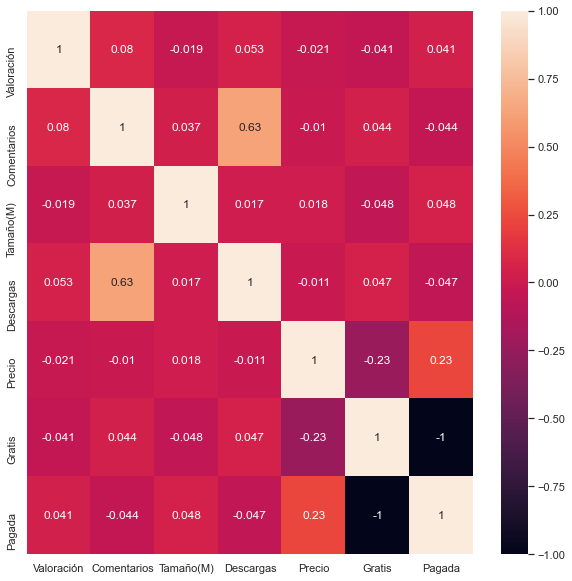

In [68]:
sbn.heatmap(apps.corr(), annot=True)

## Plantée sus preguntas acá

¿Cómo se relaciona la valoración del producto con el precio y la cantidad de descargas?
¿Qué tan probable

# Propuesta de limpieza


## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

# Implemente sus modelos desde aquí

# Evalúe sus modelos

# Responda las preguntas planteadas